In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

daily = pd.read_csv("../data/clean/daily_sales.csv")
daily["Date"] = pd.to_datetime(daily["Date"])
daily = daily.sort_values("Date")

In [2]:
df = daily.copy()

df["lag_1"] = df["TotalPrice"].shift(1)
df["lag_7"] = df["TotalPrice"].shift(7)

df["rolling_mean_7"] = df["TotalPrice"].rolling(7).mean()

df = df.dropna()

In [3]:
split_date = df["Date"].quantile(0.8)

train = df[df["Date"] <= split_date]
test = df[df["Date"] > split_date]

X_train = train[["lag_1", "lag_7", "rolling_mean_7"]]
y_train = train["TotalPrice"]

X_test = test[["lag_1", "lag_7", "rolling_mean_7"]]
y_test = test["TotalPrice"]

In [4]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

# محاسبه RMSE بعد از آموزش
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
print("Linear RMSE:", rmse)

Linear RMSE: 19162.52621391809


In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
print("Linear RMSE:", rmse)

Linear RMSE: 19162.52621391809


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

# MAE درست است
print("RF MAE:", mean_absolute_error(y_test, pred_rf))

# RMSE با np.sqrt
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
print("RF RMSE:", rmse_rf)

RF MAE: 14350.54648333335
RF RMSE: 21678.960320659924


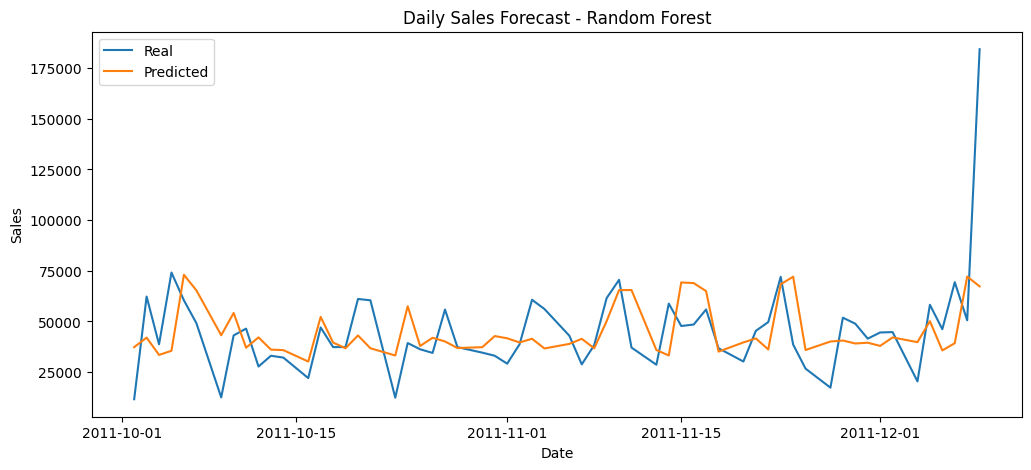

In [7]:
plt.figure(figsize=(12,5))
plt.plot(test["Date"], y_test.values, label="Real")
plt.plot(test["Date"], pred_rf, label="Predicted")

plt.title("Daily Sales Forecast - Random Forest")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()